In [207]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')


In [208]:
# Leer el archivo CSV, reemplazando guiones por NaN
df_accesos_tecnologia_localidad = pd.read_csv(
    'Datasets/00 Accesos/Accesos_Tecnologia_Localidad.csv',
    na_values='-',
    engine='python',
    encoding_errors='ignore'
)
df_penetracion_hogares = pd.read_csv('Datasets/01 Penetracion/Penetracion-hogares.csv', encoding='latin1')
df_penetracion_poblacion = pd.read_csv('Datasets/01 Penetracion/Penetracion-Poblacion.csv', encoding='latin1')
df_Internet_IngresosTotalesxTrimestre = pd.read_csv('Datasets/02 Totales/Internet_IngresosTotalesxTrimestre.csv', encoding='latin1')
df_totales_accesos_por_velocidad = pd.read_csv('Datasets/02 Totales/Totales_Accesos_por_velocidad.csv', encoding='latin1')
df_Acc_vel_loc_sinrangos = pd.read_csv('Datasets/00 Accesos/Acc_vel_loc_sinrangos.csv', encoding='latin1')

In [209]:
# Verificar valores nulos en cada DataFrame
print("Valores nulos en Accesos_Tecnologia_Localidad:")
print(df_accesos_tecnologia_localidad.isnull().sum())

Valores nulos en Accesos_Tecnologia_Localidad:
Provincia          280
Partido            280
Localidad          280
Link Indec         280
 ADSL                0
 CABLEMODEM          0
 DIAL UP             0
 FIBRA OPTICA        0
 OTROS               0
 SATELITAL           0
 WIMAX               0
 WIRELESS            0
 Total general       0
dtype: int64


Pude identificar que los valores nulos son la misma cantidad para Provincia, Partido, Localidad y Link INDEC. Estos valores corresponden a 'OTROS' o 'SIN DATOS'; a veces solo se aclara la provincia y, en otras ocasiones, tampoco se especifica el partido y/o localidad. Por ende, tampoco se muestra el Link INDEC. En los demás campos no se observan valores nulos. 


In [210]:
print("\nValores nulos en Penetracion_hogares:")
print(df_penetracion_hogares.isnull().sum())

print("\nValores nulos en Penetracion_Poblacion:")
print(df_penetracion_poblacion.isnull().sum())

print("\nValores nulos en Internet_IngresosTotalesxTrimestre:")
print(df_Internet_IngresosTotalesxTrimestre.isnull().sum())

print("\nValores nulos en Totales_Accesos_por_velocidad:")
print(df_totales_accesos_por_velocidad.isnull().sum())


Valores nulos en Penetracion_hogares:
Año                             0
 Trimestre                      0
 Provincia                      0
Accesos por cada 100 hogares    0
dtype: int64

Valores nulos en Penetracion_Poblacion:
Año                         0
 Trimestre                  0
 Provincia                  0
Accesos por cada 100 hab    0
dtype: int64

Valores nulos en Internet_IngresosTotalesxTrimestre:
Año                          0
 Trimestre                   0
Ingresos (miles de pesos)    0
 Periodo                     0
dtype: int64

Valores nulos en Totales_Accesos_por_velocidad:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64


EN ESTAS TABLAS NO EXISTEN VALORES NULOS

In [211]:
print("\nValores nulos en Acc_vel_loc_sinrangos:")
print(df_Acc_vel_loc_sinrangos.isnull().sum())


Valores nulos en Acc_vel_loc_sinrangos:
Provincia         0
Partido           0
Localidad         0
Link Indec        0
Otros          2035
0,256 Mbps     3029
0,5 Mbps       2423
0,512 Mbps     2540
0,75 Mbps      2781
1 Mbps         2193
1,5 Mbps       3050
2 Mbps         2388
2,2 Mbps       3064
2,5 Mbps       3061
3 Mbps         1801
3,3 Mbps       3064
3,5 Mbps       2695
4 Mbps         2592
4,5 Mbps       3064
5 Mbps         2105
6 Mbps         1718
6,4 Mbps       3064
7 Mbps         2872
7,5 Mbps       3064
8 Mbps         2449
9 Mbps         3014
10 Mbps        1335
10,1 Mbps      3064
10,2 Mbps      3064
11 Mbps        3038
12 Mbps        2763
12,3 Mbps      3064
13 Mbps        3051
14 Mbps        3038
15 Mbps        1967
16 Mbps        3047
17 Mbps        3064
18 Mbps        3047
20 Mbps        2001
20,5 Mbps      3064
21 Mbps        3062
22 Mbps        3064
23 Mbps        3063
24 Mbps        3047
25 Mbps        2631
25,1 Mbps      3064
25,5 Mbps      3064
26 Mbps        3064

En un análisis preliminar, observé que los valores faltantes se deben a que en cada provincia hay una cantidad específica de usuarios registrados en ciertas velocidades de internet. Los valores nulos indican que, en esos casos, no había ningún usuario suscrito a esa velocidad de servicio de internet.

In [212]:
# Reemplazar los valores nulos en el DataFrame con 0
df_Acc_vel_loc_sinrangos = df_Acc_vel_loc_sinrangos.fillna(0)

# Imprimir la cantidad de valores nulos por columna después del reemplazo
print("\nValores nulos en Acc_vel_loc_sinrangos después de reemplazar con 0:")
print(df_Acc_vel_loc_sinrangos.isnull().sum())


Valores nulos en Acc_vel_loc_sinrangos después de reemplazar con 0:
Provincia      0
Partido        0
Localidad      0
Link Indec     0
Otros          0
0,256 Mbps     0
0,5 Mbps       0
0,512 Mbps     0
0,75 Mbps      0
1 Mbps         0
1,5 Mbps       0
2 Mbps         0
2,2 Mbps       0
2,5 Mbps       0
3 Mbps         0
3,3 Mbps       0
3,5 Mbps       0
4 Mbps         0
4,5 Mbps       0
5 Mbps         0
6 Mbps         0
6,4 Mbps       0
7 Mbps         0
7,5 Mbps       0
8 Mbps         0
9 Mbps         0
10 Mbps        0
10,1 Mbps      0
10,2 Mbps      0
11 Mbps        0
12 Mbps        0
12,3 Mbps      0
13 Mbps        0
14 Mbps        0
15 Mbps        0
16 Mbps        0
17 Mbps        0
18 Mbps        0
20 Mbps        0
20,5 Mbps      0
21 Mbps        0
22 Mbps        0
23 Mbps        0
24 Mbps        0
25 Mbps        0
25,1 Mbps      0
25,5 Mbps      0
26 Mbps        0
27 Mbps        0
30 Mbps        0
31 Mbps        0
32 Mbps        0
35 Mbps        0
36 Mbps        0
40 Mbps      

Para asegurar la integridad y la consistencia en el análisis de datos, he reemplazado todos los valores nulos en el DataFrame df_Acc_vel_loc_sinrangos por 0. Este paso se realizó para evitar problemas en futuros análisis y cálculos, ya que los valores nulos pueden causar errores o resultados inesperados en operaciones matemáticas y estadísticas.

In [213]:
#for column in ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']:
#    q1 = df_accesos_tecnologia_localidad[column].quantile(0.25)
#    q3 = df_accesos_tecnologia_localidad[column].quantile(0.75)
#    iqr = q3 - q1
#    lower_bound = q1 - 1.5 * iqr
#    upper_bound = q3 + 1.5 * iqr
#    outliers = df_accesos_tecnologia_localidad[(df_accesos_tecnologia_localidad[column] < lower_bound) | (df_accesos_tecnologia_localidad[column] > upper_bound)]
#   print(f'Columna: {column}, Outliers: {outliers.shape[0]}')


Aca quise llevar a cabo el método del rango intercuartil (IQR) El KeyError indica que la columna 'ADSL' (y probablemente otras columnas en la lista) no existe en el DataFrame df_accesos_tecnologia_localidad. Esto puede deberse a que el nombre de la columna es diferente de lo esperado o tiene espacios adicionales.

In [214]:
# Eliminar espacios adicionales en los nombres de las columnas
df_accesos_tecnologia_localidad.columns = df_accesos_tecnologia_localidad.columns.str.strip()

# Verificar los nombres de las columnas después de eliminar los espacios
print(df_accesos_tecnologia_localidad.columns)

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')


In [215]:
# Reemplazar valores no numéricos (como cadenas vacías) por 0 antes de la conversión
#df_accesos_tecnologia_localidad[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']] = (
#    df_accesos_tecnologia_localidad[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']]
#    .replace('', '0')  # Reemplazar cadenas vacías por '0'
#    .replace('-', '0')  # Reemplazar guiones por '0'
#    .astype(int)  # Convertir a entero
#)

# Verificar los tipos de datos después de la conversión
#print(df_accesos_tecnologia_localidad.dtypes)

El error que estás viendo sugiere que aún hay valores en las columnas que no se pueden convertir a enteros, incluso después de reemplazar las cadenas vacías y los guiones. Es probable que haya otros caracteres no numéricos en tus columnas.

In [216]:
# Mostrar una muestra de valores no numéricos en las columnas específicas
for column in ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']:
    non_numeric_values = df_accesos_tecnologia_localidad[~df_accesos_tecnologia_localidad[column].str.replace(' ', '').str.isnumeric()][column]
    print(f'Valores no numéricos en {column}:')
    print(non_numeric_values.unique())
    print('---')

Valores no numéricos en ADSL:
[' -   ' ' 4.241 ' ' 1.834 ' ' 1.692 ' ' 3.774 ' ' 1.347 ' ' 1.010 '
 ' 1.348 ' ' 3.116 ' ' 1.250 ' ' 1.167 ' ' 1.334 ' ' 1.847 ' ' 2.031 '
 ' 4.051 ' ' 1.045 ' ' 1.196 ' ' 1.415 ' ' 3.400 ' ' 1.140 ' ' 4.318 '
 ' 1.200 ' ' 1.948 ' ' 1.202 ' ' 1.112 ' ' 1.313 ' ' 9.494 ' ' 1.282 '
 ' 2.637 ' ' 1.349 ' ' 1.422 ' ' 2.329 ' ' 4.526 ' ' 7.362 ' ' 1.411 '
 ' 1.681 ' ' 1.040 ' ' 1.617 ' ' 1.031 ' ' 1.818 ' ' 2.444 ' ' 2.675 '
 ' 3.701 ' ' 1.998 ' ' 15.837 ' ' 2.991 ' ' 2.211 ' ' 1.565 ' ' 6.128 '
 ' 4.911 ' ' 1.260 ' ' 1.274 ' ' 1.050 ' ' 2.369 ' ' 1.077 ' ' 4.797 '
 ' 70.108 ' ' 3.265 ' ' 1.512 ' ' 3.645 ' ' 2.850 ' ' 1.184 ' ' 11.887 '
 ' 3.136 ' ' 1.418 ' ' 1.493 ' ' 1.741 ' ' 28.677 ' ' 1.055 ' ' 1.057 '
 ' 1.991 ' ' 1.866 ' ' 1.039 ' ' 1.214 ' ' 1.563 ' ' 1.036 ' ' 1.244 '
 ' 1.719 ' ' 4.767 ' ' 2.127 ' ' 1.089 ' ' 2.385 ' ' 1.329 ' ' 1.394 '
 ' 2.612 ' ' 1.688 ' ' 1.269 ' ' 1.305 ' ' 6.326 ' ' 1.054 ' ' 1.280 '
 ' 1.278 ' ' 1.171 ' ' 1.832 ' ' 2.995 ' ' 1.

In [217]:
# Reemplazar valores no numéricos por 0
for column in ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']:
    df_accesos_tecnologia_localidad[column] = pd.to_numeric(df_accesos_tecnologia_localidad[column].str.replace(' ', '').replace('-', '0'), errors='coerce').fillna(0).astype(int)

# Verificar los tipos de datos después de la conversión
print(df_accesos_tecnologia_localidad.dtypes)

Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL              int32
CABLEMODEM        int32
DIAL UP           int32
FIBRA OPTICA      int32
OTROS             int32
SATELITAL         int32
WIMAX             int32
WIRELESS          int32
Total general    object
dtype: object


Remplazo los valores no numericos por 0 y los transformo en enteros, para poder tratarlos

In [218]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

Ahora si pocedo a realizar el método del rango intercuartil (IQR)

In [219]:
# Lista de columnas para verificar outliers
columns_to_check = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Identificar outliers en cada columna
for column in columns_to_check:
    # Calcular cuartiles y rango intercuartil (IQR)
    q1 = df_accesos_tecnologia_localidad[column].quantile(0.25)
    q3 = df_accesos_tecnologia_localidad[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filtrar outliers
    outliers = df_accesos_tecnologia_localidad[(df_accesos_tecnologia_localidad[column] < lower_bound) | (df_accesos_tecnologia_localidad[column] > upper_bound)]
    
    # Imprimir resultados
    print(f'Columna: {column}')
    print(f'  Cuartil 1 (Q1): {q1}')
    print(f'  Cuartil 3 (Q3): {q3}')
    print(f'  IQR: {iqr}')
    print(f'  Límite inferior: {lower_bound}')
    print(f'  Límite superior: {upper_bound}')
    print(f'  Número de outliers: {outliers.shape[0]}')
    print('---')

Columna: ADSL
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 5.0
  IQR: 5.0
  Límite inferior: -7.5
  Límite superior: 12.5
  Número de outliers: 769
---
Columna: CABLEMODEM
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 0.0
  IQR: 0.0
  Límite inferior: 0.0
  Límite superior: 0.0
  Número de outliers: 835
---
Columna: DIAL UP
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 0.0
  IQR: 0.0
  Límite inferior: 0.0
  Límite superior: 0.0
  Número de outliers: 374
---
Columna: FIBRA OPTICA
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 7.0
  IQR: 7.0
  Límite inferior: -10.5
  Límite superior: 17.5
  Número de outliers: 655
---
Columna: OTROS
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 0.0
  IQR: 0.0
  Límite inferior: 0.0
  Límite superior: 0.0
  Número de outliers: 640
---
Columna: SATELITAL
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 1.0
  IQR: 1.0
  Límite inferior: -1.5
  Límite superior: 2.5
  Número de outliers: 188
---
Columna: WIMAX
  Cuartil 1 (Q1): 0.0
  Cuartil 3 (Q3): 0.0
  IQR: 0.0
  Límite inferior: 0.0
  Límite

Este código crea una figura con una cuadrícula de gráficos de caja (boxplots) para cada una de las columnas especificadas en columns_to_plot. Cada gráfico muestra la distribución de los datos en la columna respectiva, permitiendo la identificación de valores atípicos y la comparación entre diferentes tecnologías de acceso a internet.

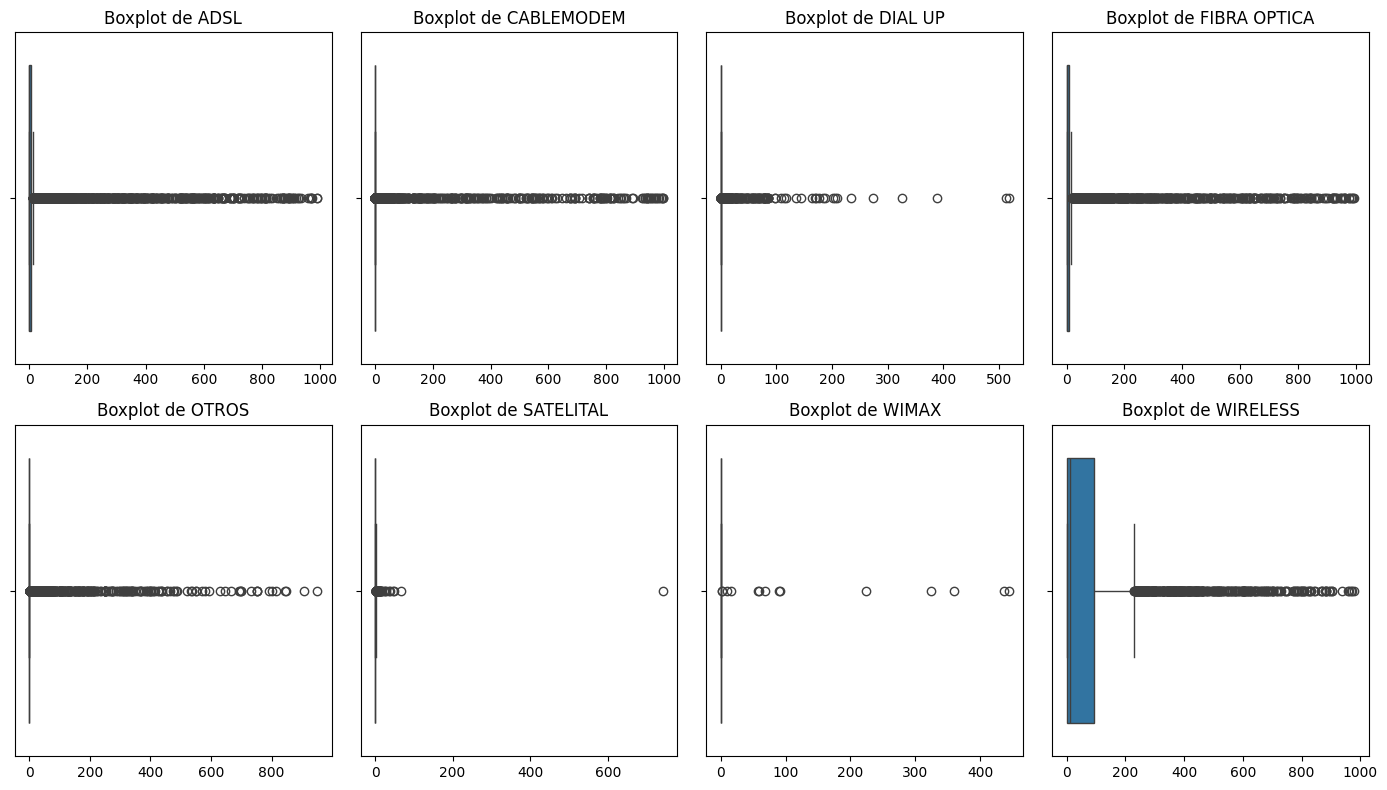

In [220]:
# Lista de columnas para visualizar
columns_to_plot = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Configuración de gráficos
plt.figure(figsize=(14, 8))

# Crear un gráfico de caja para cada columna
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 4, i + 1)  # Crear un subplot en una cuadrícula de 2x4
    sns.boxplot(data=df_accesos_tecnologia_localidad, x=column)
    plt.title(f'Boxplot de {column}')
    plt.xlabel('')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

Me llamo la atencion el outlier en el Acceso Satelital. Profundizando mas en esta columna note que en la localidad de 25 de Mayo en la provincia de Buenos Aires (index 0) hay un 742 que a mi entender pudo haber sido un error de tipeo ya que hay demasiada diferencia entre los otros datos.

En DIAL UP, es normal que haya +500 debido a la poblacion que hay en esas Localidades, como por ejemplo Mar del Plata, La Plata o Ciudad Autónoma de Buenos Aires

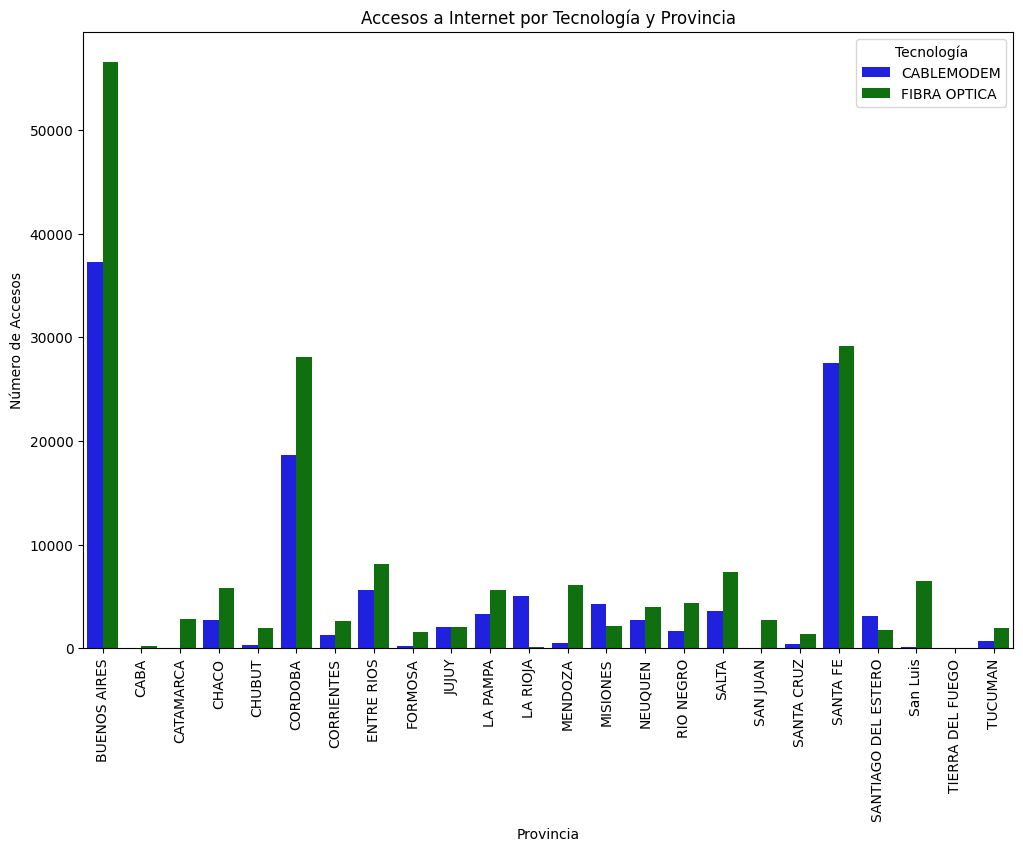

In [221]:
# Supongamos que tu DataFrame es df_accesos_tecnologia_localidad
# Agrupa los datos por 'Provincia' y calcula la suma para cada tecnología
df_grouped = df_accesos_tecnologia_localidad.groupby('Provincia').agg({
    'CABLEMODEM': 'sum',
    'FIBRA OPTICA': 'sum'
}).reset_index()

# Reorganiza el DataFrame para el gráfico de barras
df_melted = pd.melt(df_grouped, id_vars='Provincia', value_vars=['CABLEMODEM', 'FIBRA OPTICA'], var_name='Tecnologia', value_name='Accesos')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Provincia', y='Accesos', hue='Tecnologia', palette={'CABLEMODEM': 'blue', 'FIBRA OPTICA': 'green'})
plt.title('Accesos a Internet por Tecnología y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')
plt.show()

En el gráfico de barras que muestra la relación entre 'CABLEMODEM' y 'FIBRA OPTICA', se visualizan dos variables cuantitativas. En este tipo de gráfico, las barras representan valores numéricos y permiten comparar las magnitudes de estas variables en diferentes categorías o conjuntos de datos.

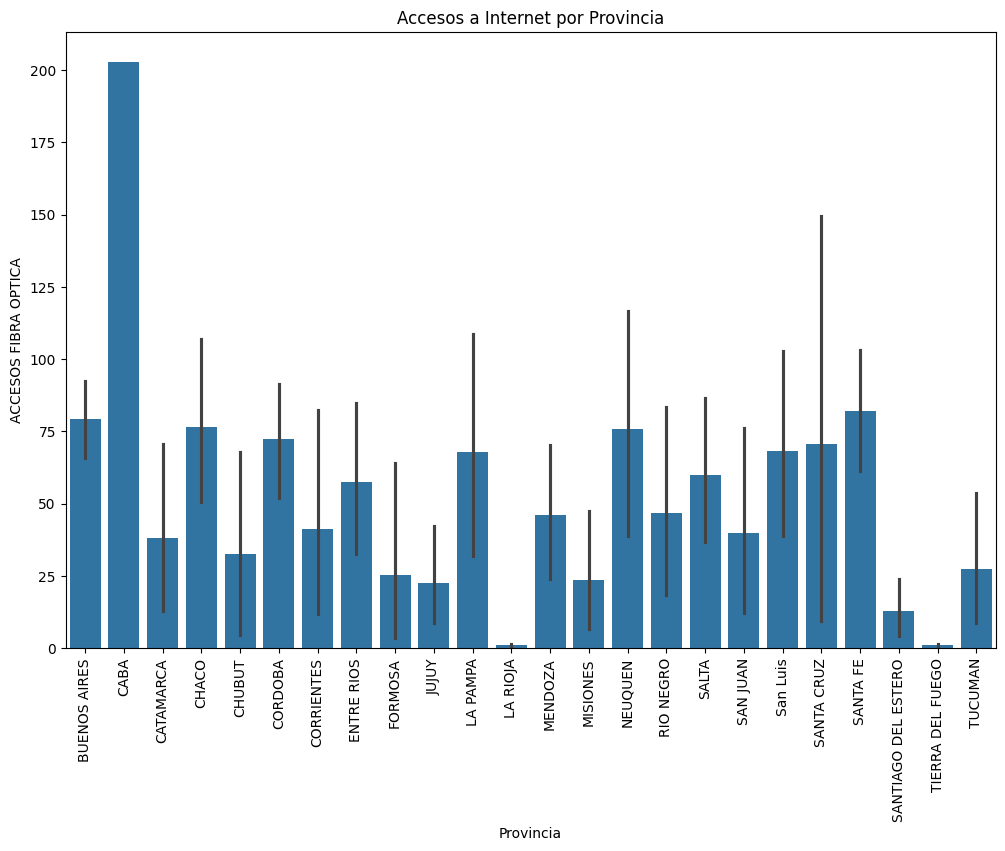

In [229]:
# Supongamos que queremos ver la relación entre 'Provincia' y 'FIBRA OPTICA'
plt.figure(figsize=(12, 8))
sns.barplot(data=df_accesos_tecnologia_localidad, x='Provincia', y='FIBRA OPTICA')
plt.title('Accesos a Internet por Provincia')
plt.xticks(rotation=90)
plt.ylabel('ACCESOS FIBRA OPTICA')
plt.show()

El gráfico en sí visualiza datos cuantitativos (FIBRA OPTICA) en relación con una variable cualitativa (Provincia).

KPI PROPIO:

Objetivo del KPI
El objetivo de este KPI es analizar el crecimiento (en porcentaje) de las conexiones que tienen velocidades superiores a 30 Mbps, lo que es un indicador de la mejora en la infraestructura de internet y en el acceso a servicios de alta velocidad.

Fórmula del KPI
La fórmula para calcular este KPI es:
* Crecimiento Más de 30 Mbps = ((Total 'Más de 30 Mbps' trimestre actual - Total 'Más de 30 Mbps' trimestre anterior) / Total 'Más de 30 Mbps' trimestre anterior) * 100



In [230]:

# Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\Usuario\Desktop\Proyecto 2\Datasets\02 Totales\Totales_Accesos_por_velocidad.csv', encoding='latin1')

# Mostrar las primeras filas para revisión
print(df.head())

# Eliminar filas con valores nulos
df = df.dropna()

# Reemplazar puntos por nada y convertir a float
df['Más de 30 Mbps'] = df['Más de 30 Mbps'].str.replace('.', '', regex=False).astype(float)

# Convertir columnas a tipos de datos correctos
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)

# Eliminar duplicados
df = df.drop_duplicates()

# Renombrar columnas si es necesario
df = df.rename(columns={'Más de 30 Mbps': 'Conexiones_30Mbps'})

# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('kpi_2.csv', index=False)


    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          1          28.801                   69.355   
1  2023          4          29.708                   71.742   
2  2023          3          30.274                   80.609   
3  2023          2          30.827                   79.405   
4  2023          1          31.437                   82.048   

  Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps  \
0               866.152                950.930                 672.155   
1               900.253                978.108                 697.232   
2               945.608                998.725                 720.084   
3               963.510              1.028.250                 734.125   
4             1.001.553              1.060.321                 729.194   

  Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  
0                 353.896      8.363.694  328.173  11.633.156  
1                 350.290      8.224.736  295.59

KPI = ((Nuevo_acceso - Acceso_actual) / Acceso_actual) * 100


In [233]:
df.columns

Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps',
       'Conexiones_30Mbps', 'OTROS', 'Total'],
      dtype='object')